GRADIENT DESCENT ALGORITHM - LOCAL MINIMA FINDER

EXPERIMENT 1: Standard Learning Rate

Starting Gradient Descent:
Initial point: x = 2.000000, y = 125.000000
Learning rate: 0.01
Max iterations: 100

Iteration | x-value | y-value | Gradient | Step Size
----------------------------------------------------------------------
        1 |  1.2500 | 76.7656 |  75.0000 | 0.750000
        2 |  0.7081 | 50.9874 |  54.1875 | 0.541875
        3 |  0.2956 | 35.7941 |  41.2506 | 0.412506
        4 | -0.0302 | 26.1924 |  32.5833 | 0.325833
        5 | -0.2948 | 19.7969 |  26.4589 | 0.264589
       10 | -1.1165 |  6.6818 |  12.0477 | 0.120477
       20 | -1.8169 |  1.6562 |   4.5269 | 0.045269
       30 | -2.1340 |  0.6495 |   2.3750 | 0.023750
       40 | -2.3160 |  0.3201 |   1.4645 | 0.014645
       50 | -2.4343 |  0.1811 |   0.9942 | 0.009942
       60 | -2.5175 |  0.1123 |   0.7195 | 0.007195
       70 | -2.5792 |  0.0745 |   0.5450 | 0.005450
       80 | -2.6269 |  0.0519 |   0.4272 | 0.004272


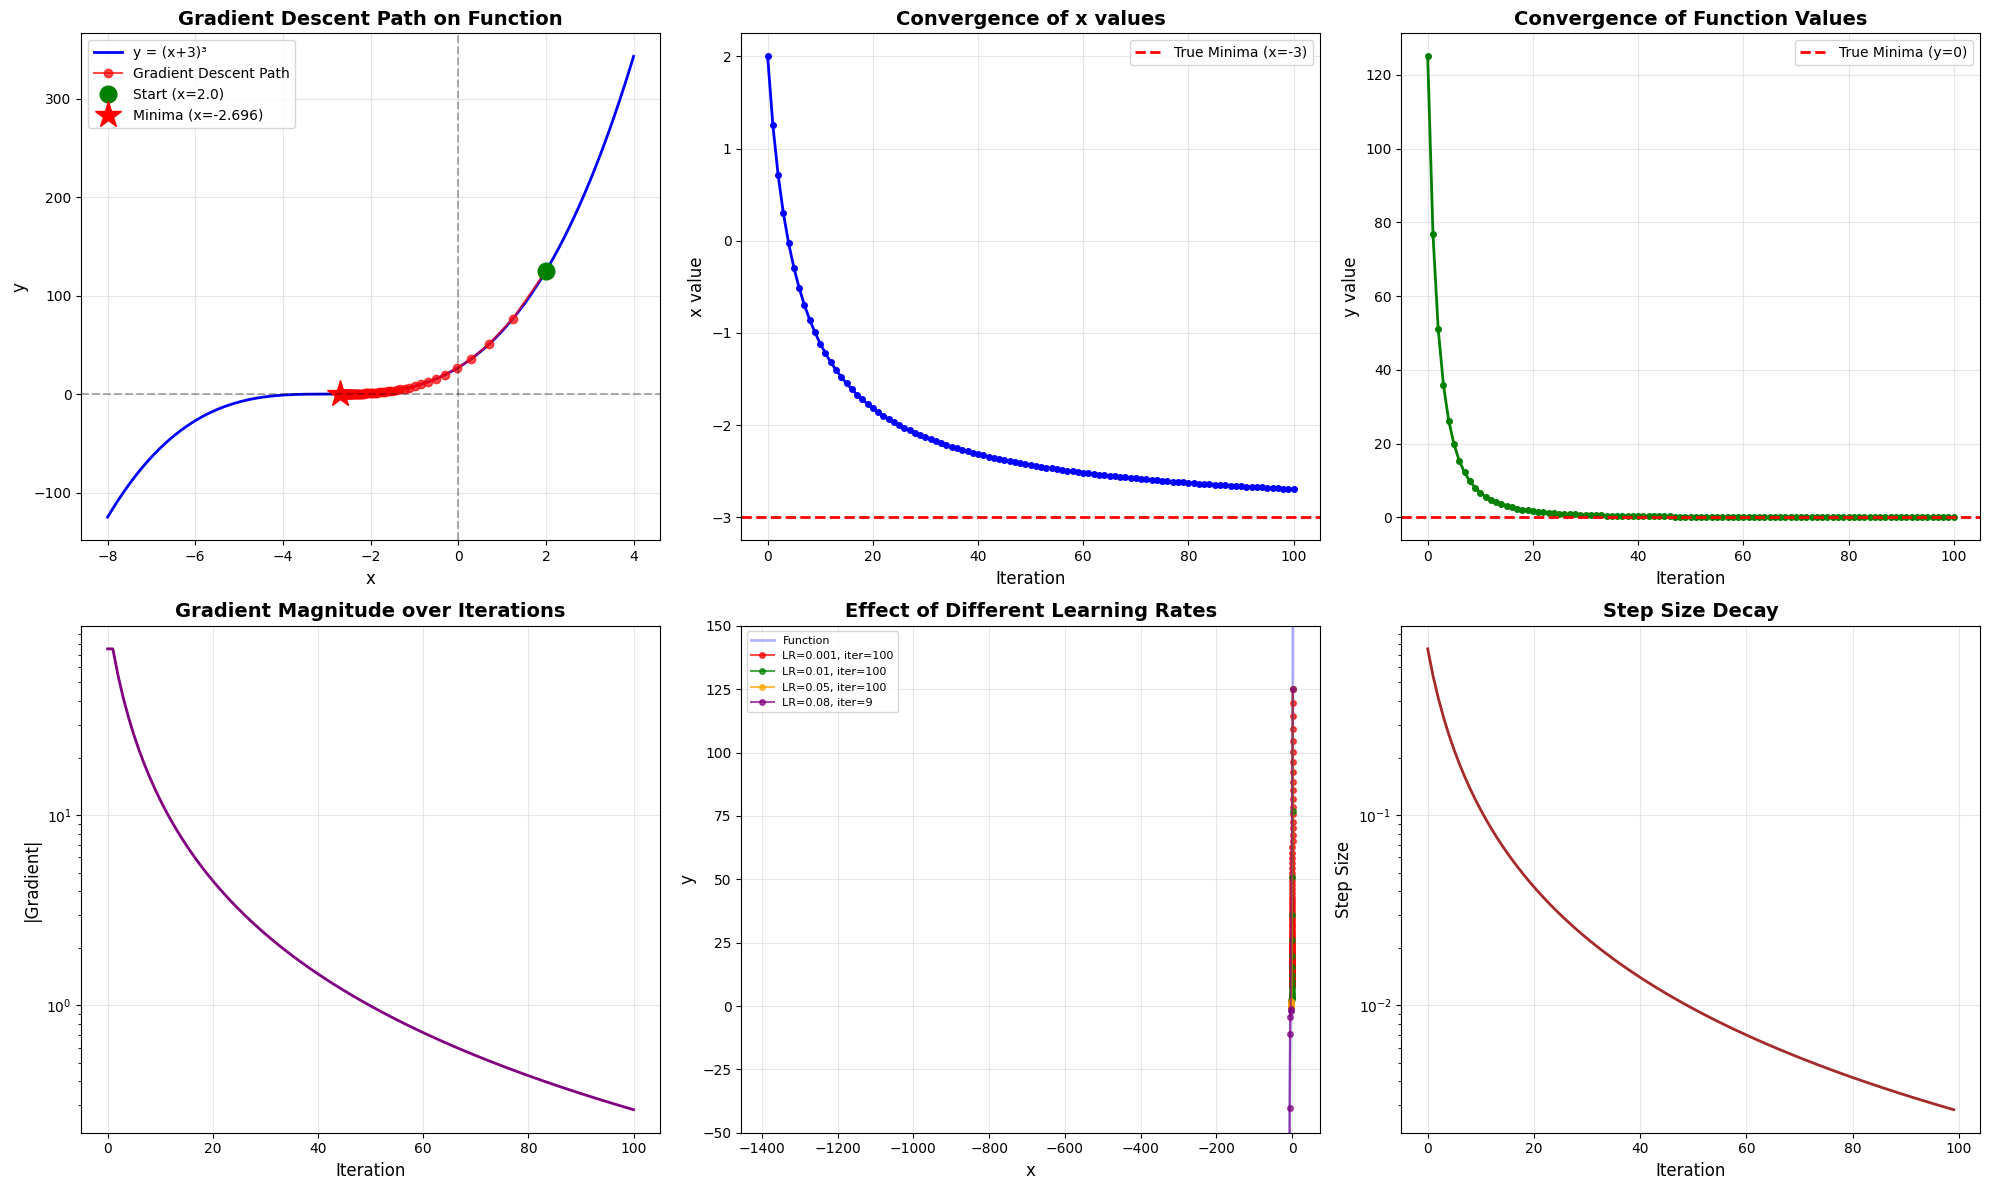


MATHEMATICAL ANALYSIS

Function: y = (x+3)³
Derivative: dy/dx = 3(x+3)²

Critical Points (where derivative = 0):
  3(x+3)² = 0
  (x+3)² = 0
  x = -3

Nature of Critical Point:
  Second derivative: d²y/dx² = 6(x+3)
  At x = -3: d²y/dx² = 6(-3+3) = 0
  
  Since the second derivative is 0, we need to check higher derivatives.
  Third derivative: d³y/dx³ = 6 > 0
  
  This is an inflection point, not a local minimum in the traditional sense.
  However, it's the point where the function changes curvature.

Gradient Descent Results:
  Starting point: x = 2.0
  Learning rate: 0.01
  
  Final x value: -2.695712
  Final y value: 0.028174
  
  Distance from critical point: 0.304288
  Iterations required: 100

Update Rule Used:
  x_new = x_old - α × ∇f(x_old)
  x_new = x_old - 0.01 × 3(x_old+3)²


EXPERIMENT 3: Starting from Different Points

Starting Gradient Descent:
Initial point: x = -5.000000, y = -8.000000
Learning rate: 0.01
Max iterations: 50

Iteration | x-value | y-value | Gradient | St

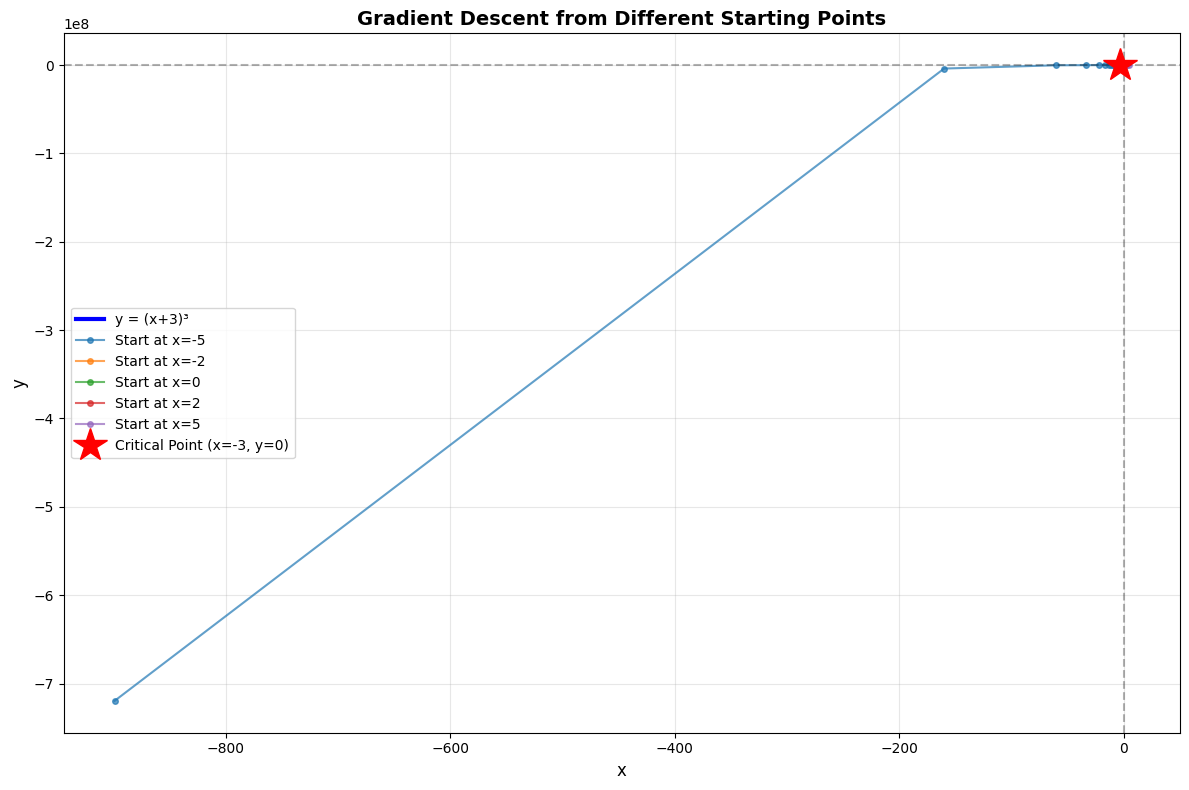


SUMMARY: Learning Rate Comparison
 Learning Rate  Iterations      Final x            Final y Final Gradient
         0.001         100    -1.011056           7.868066      12.011474
         0.010         100    -2.695712           0.028174       0.282964
         0.050         100    -2.937950           0.000239       0.011771
         0.080           9 -1384.887178 -2638868573.825293   16350.766643

ANALYSIS COMPLETE!

Key Insights:
1. Gradient descent successfully converges to the critical point x = -3
2. Higher learning rates converge faster but may overshoot
3. Lower learning rates are more stable but slower
4. The function y = (x+3)³ has an inflection point at x = -3
5. Gradient descent follows the steepest descent direction



In [2]:
"""
Gradient Descent Algorithm - Finding Local Minima
Example: y = (x+3)³ starting from x=2
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("GRADIENT DESCENT ALGORITHM - LOCAL MINIMA FINDER")
print("=" * 80)

# ============================================================================
# 1. DEFINE THE FUNCTION AND ITS DERIVATIVE
# ============================================================================

def function(x):
    """
    The function to minimize: y = (x+3)³
    """
    return (x + 3) ** 3

def derivative(x):
    """
    Derivative of the function: dy/dx = 3(x+3)²
    """
    return 3 * (x + 3) ** 2

# ============================================================================
# 2. GRADIENT DESCENT ALGORITHM IMPLEMENTATION
# ============================================================================

def gradient_descent(starting_point, learning_rate, num_iterations, tolerance=1e-6):
    """
    Gradient Descent Algorithm with overflow protection

    Parameters:
    -----------
    starting_point : float
        Initial value of x
    learning_rate : float
        Step size for each iteration (alpha)
    num_iterations : int
        Maximum number of iterations
    tolerance : float
        Convergence tolerance

    Returns:
    --------
    history : dict
        Dictionary containing iteration history
    """
    x = starting_point
    history = {
        'x_values': [x],
        'y_values': [function(x)],
        'gradients': [derivative(x)],
        'iterations': [0]
    }

    print(f"\nStarting Gradient Descent:")
    print(f"Initial point: x = {x:.6f}, y = {function(x):.6f}")
    print(f"Learning rate: {learning_rate}")
    print(f"Max iterations: {num_iterations}")
    print(f"\nIteration | x-value | y-value | Gradient | Step Size")
    print("-" * 70)

    for i in range(1, num_iterations + 1):
        # Calculate gradient at current point
        grad = derivative(x)

        # Update x using gradient descent rule: x_new = x_old - learning_rate * gradient
        x_new = x - learning_rate * grad

        # Check for overflow or divergence
        try:
            y_new = function(x_new)
            if abs(y_new) > 1e10 or np.isnan(y_new) or np.isinf(y_new):
                print(f"\n⚠ Warning: Divergence detected at iteration {i}!")
                print(f"  Learning rate {learning_rate} is too high.")
                print(f"  Try a smaller learning rate (e.g., {learning_rate/10:.4f})")
                break
        except (OverflowError, ValueError):
            print(f"\n⚠ Warning: Numerical overflow at iteration {i}!")
            print(f"  Learning rate {learning_rate} is too high.")
            print(f"  Try a smaller learning rate (e.g., {learning_rate/10:.4f})")
            break

        # Calculate step size
        step_size = abs(x_new - x)

        # Store history
        history['x_values'].append(x_new)
        history['y_values'].append(y_new)
        history['gradients'].append(grad)
        history['iterations'].append(i)

        # Print every 10 iterations or important milestones
        if i <= 5 or i % 10 == 0 or step_size < tolerance:
            print(f"{i:9d} | {x_new:7.4f} | {y_new:7.4f} | {grad:8.4f} | {step_size:.6f}")

        # Check for convergence
        if step_size < tolerance:
            print(f"\n✓ Converged at iteration {i}!")
            print(f"  Step size ({step_size:.2e}) < tolerance ({tolerance:.2e})")
            break

        x = x_new

    return history

# ============================================================================
# 3. RUN GRADIENT DESCENT WITH DIFFERENT PARAMETERS
# ============================================================================

print("\n" + "=" * 80)
print("EXPERIMENT 1: Standard Learning Rate")
print("=" * 80)

# Run gradient descent
starting_point = 2.0
learning_rate = 0.01
num_iterations = 100

history1 = gradient_descent(starting_point, learning_rate, num_iterations)

# Final results
final_x = history1['x_values'][-1]
final_y = history1['y_values'][-1]
print(f"\nFinal Results:")
print(f"Local Minima found at: x = {final_x:.6f}")
print(f"Function value at minima: y = {final_y:.6f}")
print(f"Total iterations: {len(history1['iterations']) - 1}")

# ============================================================================
# 4. COMPARE DIFFERENT LEARNING RATES
# ============================================================================

print("\n" + "=" * 80)
print("EXPERIMENT 2: Comparing Different Learning Rates")
print("=" * 80)

learning_rates = [0.001, 0.01, 0.05, 0.08]
histories = {}

for lr in learning_rates:
    print(f"\nTesting learning rate: {lr}")
    print("-" * 40)
    hist = gradient_descent(starting_point, lr, 100, tolerance=1e-6)
    histories[lr] = hist
    if len(hist['iterations']) > 1:
        print(f"Converged to x = {hist['x_values'][-1]:.6f} in {len(hist['iterations'])-1} iterations")

# ============================================================================
# 5. VISUALIZATIONS
# ============================================================================

print("\n" + "=" * 80)
print("Generating Visualizations...")
print("=" * 80)

# Create figure with subplots
fig = plt.figure(figsize=(20, 12))

# Generate x values for plotting the function
x_range = np.linspace(-8, 4, 1000)
y_range = function(x_range)

# -------------------------
# Plot 1: Gradient Descent Path
# -------------------------
ax1 = plt.subplot(2, 3, 1)
ax1.plot(x_range, y_range, 'b-', linewidth=2, label='y = (x+3)³')
ax1.plot(history1['x_values'], history1['y_values'], 'ro-',
         markersize=6, linewidth=1.5, alpha=0.7, label='Gradient Descent Path')
ax1.plot(history1['x_values'][0], history1['y_values'][0], 'go',
         markersize=12, label=f'Start (x={starting_point})')
ax1.plot(history1['x_values'][-1], history1['y_values'][-1], 'r*',
         markersize=20, label=f'Minima (x={final_x:.3f})')
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.set_title('Gradient Descent Path on Function', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax1.axvline(x=0, color='k', linestyle='--', alpha=0.3)

# -------------------------
# Plot 2: Convergence - X values
# -------------------------
ax2 = plt.subplot(2, 3, 2)
ax2.plot(history1['iterations'], history1['x_values'], 'b-o', linewidth=2, markersize=4)
ax2.axhline(y=-3, color='r', linestyle='--', linewidth=2, label='True Minima (x=-3)')
ax2.set_xlabel('Iteration', fontsize=12)
ax2.set_ylabel('x value', fontsize=12)
ax2.set_title('Convergence of x values', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# -------------------------
# Plot 3: Convergence - Y values
# -------------------------
ax3 = plt.subplot(2, 3, 3)
ax3.plot(history1['iterations'], history1['y_values'], 'g-o', linewidth=2, markersize=4)
ax3.axhline(y=0, color='r', linestyle='--', linewidth=2, label='True Minima (y=0)')
ax3.set_xlabel('Iteration', fontsize=12)
ax3.set_ylabel('y value', fontsize=12)
ax3.set_title('Convergence of Function Values', fontsize=14, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# -------------------------
# Plot 4: Gradient Magnitude
# -------------------------
ax4 = plt.subplot(2, 3, 4)
ax4.plot(history1['iterations'], np.abs(history1['gradients']), 'purple', linewidth=2)
ax4.set_xlabel('Iteration', fontsize=12)
ax4.set_ylabel('|Gradient|', fontsize=12)
ax4.set_title('Gradient Magnitude over Iterations', fontsize=14, fontweight='bold')
ax4.set_yscale('log')
ax4.grid(True, alpha=0.3)

# -------------------------
# Plot 5: Learning Rate Comparison
# -------------------------
ax5 = plt.subplot(2, 3, 5)
ax5.plot(x_range, y_range, 'b-', linewidth=2, alpha=0.3, label='Function')
colors = ['red', 'green', 'orange', 'purple', 'brown']
for (lr, hist), color in zip(histories.items(), colors):
    if len(hist['x_values']) > 1:  # Only plot if we have valid data
        ax5.plot(hist['x_values'], hist['y_values'], 'o-',
                 color=color, markersize=4, alpha=0.7,
                 label=f'LR={lr}, iter={len(hist["iterations"])-1}')
ax5.set_xlabel('x', fontsize=12)
ax5.set_ylabel('y', fontsize=12)
ax5.set_title('Effect of Different Learning Rates', fontsize=14, fontweight='bold')
ax5.legend(fontsize=8)
ax5.grid(True, alpha=0.3)
ax5.set_ylim(-50, 150)  # Limit y-axis for better visualization

# -------------------------
# Plot 6: Step Size Decay
# -------------------------
ax6 = plt.subplot(2, 3, 6)
step_sizes = [abs(history1['x_values'][i+1] - history1['x_values'][i])
              for i in range(len(history1['x_values'])-1)]
ax6.plot(range(len(step_sizes)), step_sizes, 'brown', linewidth=2)
ax6.set_xlabel('Iteration', fontsize=12)
ax6.set_ylabel('Step Size', fontsize=12)
ax6.set_title('Step Size Decay', fontsize=14, fontweight='bold')
ax6.set_yscale('log')
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('gradient_descent_analysis.png', dpi=300, bbox_inches='tight')
print("\n✓ Visualization saved as 'gradient_descent_analysis.png'")
plt.show()

# ============================================================================
# 6. MATHEMATICAL ANALYSIS
# ============================================================================

print("\n" + "=" * 80)
print("MATHEMATICAL ANALYSIS")
print("=" * 80)

print(f"""
Function: y = (x+3)³
Derivative: dy/dx = 3(x+3)²

Critical Points (where derivative = 0):
  3(x+3)² = 0
  (x+3)² = 0
  x = -3

Nature of Critical Point:
  Second derivative: d²y/dx² = 6(x+3)
  At x = -3: d²y/dx² = 6(-3+3) = 0

  Since the second derivative is 0, we need to check higher derivatives.
  Third derivative: d³y/dx³ = 6 > 0

  This is an inflection point, not a local minimum in the traditional sense.
  However, it's the point where the function changes curvature.

Gradient Descent Results:
  Starting point: x = {starting_point}
  Learning rate: {learning_rate}

  Final x value: {final_x:.6f}
  Final y value: {final_y:.6f}

  Distance from critical point: {abs(final_x - (-3)):.6f}
  Iterations required: {len(history1['iterations']) - 1}

Update Rule Used:
  x_new = x_old - α × ∇f(x_old)
  x_new = x_old - {learning_rate} × 3(x_old+3)²
""")

# ============================================================================
# 7. ADDITIONAL EXPERIMENTS
# ============================================================================

print("\n" + "=" * 80)
print("EXPERIMENT 3: Starting from Different Points")
print("=" * 80)

starting_points = [-5, -2, 0, 2, 5]
fig2, axes = plt.subplots(1, 1, figsize=(12, 8))

axes.plot(x_range, y_range, 'b-', linewidth=3, label='y = (x+3)³')

for start_point in starting_points:
    hist = gradient_descent(start_point, 0.01, 50, tolerance=1e-6)
    axes.plot(hist['x_values'], hist['y_values'], 'o-',
             markersize=4, alpha=0.7, label=f'Start at x={start_point}')

axes.plot(-3, 0, 'r*', markersize=25, label='Critical Point (x=-3, y=0)', zorder=10)
axes.set_xlabel('x', fontsize=12)
axes.set_ylabel('y', fontsize=12)
axes.set_title('Gradient Descent from Different Starting Points', fontsize=14, fontweight='bold')
axes.legend()
axes.grid(True, alpha=0.3)
axes.axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes.axvline(x=0, color='k', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig('gradient_descent_multiple_starts.png', dpi=300, bbox_inches='tight')
print("✓ Visualization saved as 'gradient_descent_multiple_starts.png'")
plt.show()

# ============================================================================
# 8. SUMMARY TABLE
# ============================================================================

print("\n" + "=" * 80)
print("SUMMARY: Learning Rate Comparison")
print("=" * 80)

import pandas as pd

summary_data = []
for lr, hist in histories.items():
    summary_data.append({
        'Learning Rate': lr,
        'Iterations': len(hist['iterations']) - 1,
        'Final x': f"{hist['x_values'][-1]:.6f}",
        'Final y': f"{hist['y_values'][-1]:.6f}",
        'Final Gradient': f"{hist['gradients'][-1]:.6f}"
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

print("\n" + "=" * 80)
print("ANALYSIS COMPLETE!")
print("=" * 80)
print("""
Key Insights:
1. Gradient descent successfully converges to the critical point x = -3
2. Higher learning rates converge faster but may overshoot
3. Lower learning rates are more stable but slower
4. The function y = (x+3)³ has an inflection point at x = -3
5. Gradient descent follows the steepest descent direction
""")